# Perceptron

Perceptron is the simplest neural network possible. Orignaly it was *binary classificator* (that means, that it decides if it is true or false). <br>
The algorithm was invented by *Frank Rosenblat* in 1958 (check english [wikipedia](https://en.wikipedia.org/wiki/Perceptron) for more historic details)

Consider following model of perceptron:

<img src="data/perceptron.svg" alt="perceptron" style="width: 100%;"/>

We can then rewrite that model to one formula:

$$percetpron(x_{1}, x_{2}, \dots, x_{n}) = \phi\bigg( \theta +  \sum_{i=1}^{n} w_ix_i\bigg)$$

Where $x_{1}, x_{2}, \dots, x_{n}$ are *inputs*, $w_{1}, w_{2}, \dots, w_{n}$ are *weights*, $\theta$ is a *bias* and $\phi$ is an *activation function*.

We can also rewrite this equation to *vector form*:

$$perceptron(\mathbf{x}) = \phi(\mathbf{w_{A}}\mathbf{x_{A}})$$

Where
$\mathbf{x} = [ x_{1}, x_{2}, \dots, x_{n}]$ is input vector,
$\mathbf{x_A} = [1, x_{1}, x_{2}, \dots, x_{n}]$ is *augmented input vector* and
$\mathbf{w_A} = [\theta, w_{1}, w_{2}, \dots, w_{n}]$ is *augmented weight vector*. Note that this mathematical form is much better for implementation (it is just one vector operation and one function applied on vector)

## First learning algorithm - Step by Step Gradient Descent (SbSGD)

Now, that we defined our model (we have an intuitive idea, how neural unit in brain works) and we also have mathematical equation (model of a neural unit), we need to specify, how to make this neural unit learn.

We will use very well known idea of *optimatization* of something. We will define some criterium (which will basically quantify, how bad our neural unit is). We will call that **Error function** (denoted as $J$).

Error function is a function, which depends on augmented weight vector and on a input-output pair ($\mathbf{x_A},y_{real}$) and  will be defined as follows:

$$J(\mathbf{w_A}) = e^2 = (perceptron(\mathbf{x}) - y_{real})^2 = (\mathbf{w_A}\mathbf{x_A} - y_{real})^2$$

Now, since our adaptive parameters are $\mathbf{w_A}$, we need to partial derivative of $J$ function to determine gradients:

$$\frac{\partial J(\mathbf{w_A})}{\partial \mathbf{w_A}} = \frac{\partial e^2}{\partial \mathbf{w_A}} = \frac{\partial e^2}{\partial e} \frac{\partial e}{\partial \mathbf{w_A}} = \frac{\partial e^2}{\partial e} \frac{\mathbf{x_A}\mathbf{w_A} - y_{real}}{\partial \mathbf{w_A}} = 2e\mathbf{x_A}$$

Also note, that $e$ is actually an error of our model (perceptron in this case). $e = \mathbf{w_A}\mathbf{x_A} - y_{real}$, it will help us to make implementation easier.

So we have gradients of our error function $J$ and since we want to minimize it, our update rule will be written as:

$$\mathbf{w_A}[k+1] = \mathbf{w_A}[k] + \mathbf{\Delta w_A}[k] $$

Where $\mathbf{\Delta w_A}[k]$:

$$\mathbf{\Delta w_A}[k] = - \alpha \ e \ \mathbf{x_A}[k] $$

Where $\alpha$ is *learning rate* (for our purpouses will be set between $0.1$ or $0.001$) and $k$ is iteration of training.

## Implementation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
class Perceptron:
    """
    A simple Perceptron with linear activation and gradient descent training.
    This perceptron outputs a continuous value (no threshold activation).
    """

    def __init__(self, num_weights: int):
        """
        Initialize perceptron with weights set to zero.
        :param num_weights: Number of input features.
        """
        self.num_weights = num_weights
        self.weights = np.zeros((num_weights, 1))  # Column vector of weights

    def predict(self, x: np.ndarray) -> float:
        """
        Compute the perceptron's output for a single input vector.
        :param x: Input row vector of shape (1, num_weights)
        :return: Scalar output
        """
        return float(np.dot(x, self.weights))

    def trainGD(self, X_train: np.ndarray, y_train: np.ndarray, alpha: float = 0.1):
        """
        Train the perceptron using gradient descent.
        :param X_train: Training data matrix of shape (n_samples, num_weights)
        :param y_train: Target values vector of shape (n_samples,)
        :param alpha: Learning rate
        """
        for i in range(X_train.shape[0]):
            x_i = X_train[i][np.newaxis, :]  # Shape (1, num_weights)
            prediction = np.dot(x_i, self.weights)  # Shape (1, 1)
            error = prediction - y_train[i]         # Shape (1, 1)
            gradient = error * x_i                  # Shape (1, num_weights)
            self.weights -= alpha * gradient.T      # Transpose to shape (num_weights, 1)


### Problem to solve 1 - is it linear regression?

Imagine we have following problem, we know the price (in thousands dollars) of a house based on number of rooms.

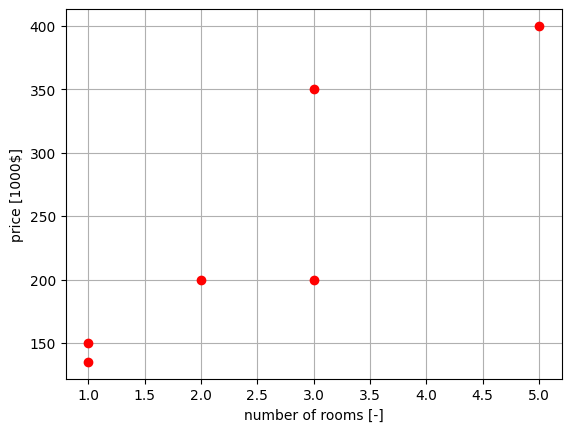

In [11]:
price = np.array([150., 135., 200., 400., 350., 200.])
num_rooms = np.array([1, 1, 2, 5, 3, 3])
plt.figure(dpi=100)
plt.plot(num_rooms, price,"ro")
plt.xlabel("number of rooms [-]")
plt.ylabel("price [1000$]")
plt.grid()
plt.show()

As you can see, for example we dont have any information, how expensive is house with only 3 rooms. I am pretty sure, all of you would be possible to solve it by *linear regression*, but we will use perceptron with linear activation function and we will train it on these data, to hopefully obtain similar result we would obtain by linear regression.

In [12]:
p1 = Perceptron(2) # 2 weights, bias and weight 1

In [13]:
MatX = np.c_[np.ones((len(num_rooms), 1)), num_rooms[:,np.newaxis]] # features
VecY = price[:, np.newaxis] # targets (price of house)

In [17]:
# dictionary for visualisation of training process
training = {
    "before_training": np.ravel(np.dot(MatX, p1.weights)),
}
alpha = 0.02
# training
for epoch in range(3):
    p1.trainGD(MatX, VecY, alpha)
    training["epoch{}".format(epoch+1)] = np.ravel(np.dot(MatX, p1.weights))

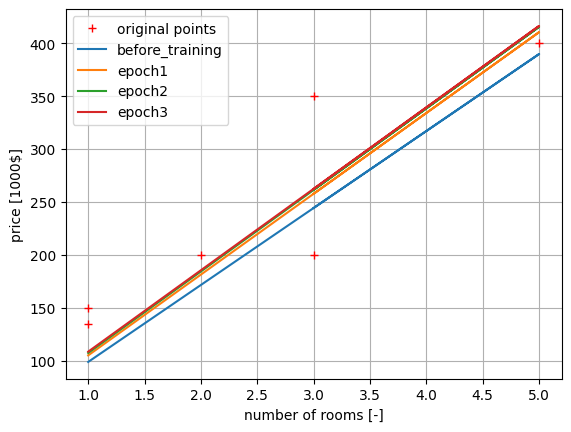

In [18]:
plt.figure(dpi=100)
plt.plot(num_rooms, price, "r+", label="original points")
for key in training:
    plt.plot(num_rooms, training[key], "-", label=key)
plt.xlabel("number of rooms [-]")
plt.ylabel("price [1000$]")
plt.grid()
plt.legend()
plt.show()

### Problem to solve 2 - classification cats vs dogs

Imagine we have two sets of animals with two information about them for example *weight* in kilograms and *speed* in kilometers per hour. 

In [19]:
dogs = {
    "weight": [20.5, 35., 40., 13.5],
    "speed": [30., 26., 20., 19.],
    "isdog": [True, True, True, True],
}
cats = {
    "weight": [7.5, 6.0, 15.0],
    "speed": [32., 30., 52.0],
    "isdog": [False, False, False]
}
df = pd.concat([pd.DataFrame(dogs), pd.DataFrame(cats)]).reset_index(drop=True)

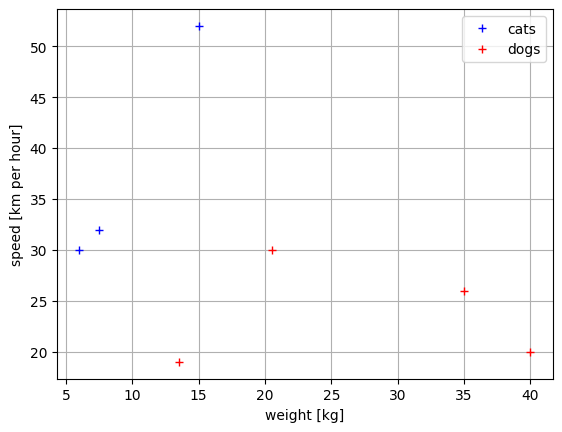

In [20]:
plt.figure(dpi=100)
for isdog, group in df.groupby("isdog"):
    l = "dogs" if isdog else "cats"
    marker = "r+" if isdog else "b+"
    plt.plot(group["weight"].values, group["speed"].values,
             marker, label = l)
plt.xlabel("weight [kg]")
plt.ylabel("speed [km per hour]")
plt.legend()
plt.grid()
plt.show()

In [27]:
def sigmoid(x):                                      
    return 1. / (1 + np.exp(-x))

class Perceptron2(Perceptron):
    """ Perceptron with sigmoid activation function
    """
    def trainGD(self, MatrixX, VectorY, alpha=0.1):
        rows = np.shape(MatrixX)[0]
        for k in range(rows):
            currentX = MatrixX[k][np.newaxis, :]
            value = sigmoid(np.dot(currentX, self.weights))
            error = value - VectorY[k]
            sigmoid_d = value * (1. - value)
            deltaWeights = - alpha * error * sigmoid_d * currentX
            self.weights = self.weights + deltaWeights.T 

In [28]:
p2 = Perceptron2(3)

In [29]:
data = df.values.astype(np.float32)
MatX = np.c_[np.ones((len(data), 1)),data[:,0:2]]
VecY = data[:,2:3]

In [30]:
for epoch in range(20):
    p2.trainGD(MatX, VecY, 0.01)

In [31]:
xlim = (df["weight"].min()-5, df["weight"].max()+5)
ylim = (df["speed"].min()-5, df["speed"].max()+5)

In [32]:
xv, yv = np.meshgrid(
    np.linspace(xlim[0], xlim[1], 50),
    np.linspace(ylim[0], ylim[1], 50),    
)
ones = np.ones(np.shape(xv))

In [33]:
input_space = np.concatenate([ones[:,:,np.newaxis], xv[:,:,np.newaxis],
                              yv[:,:,np.newaxis]], axis=2)

In [36]:
output = sigmoid(np.dot(input_space, p2.weights))

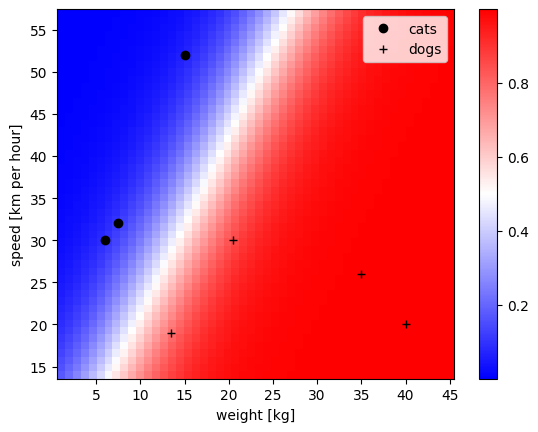

In [37]:
plt.figure(dpi=100)
plt.pcolormesh(xv, yv, output[:,:,0], cmap="bwr")
for isdog, group in df.groupby("isdog"):
    l = "dogs" if isdog else "cats"
    marker = "k+" if isdog else "ko"
    plt.plot(group["weight"].values, group["speed"].values,
             marker, label = l)
plt.xlabel("weight [kg]")
plt.ylabel("speed [km per hour]")
plt.legend()
plt.colorbar()
plt.show()